<a href="https://colab.research.google.com/github/Himanshu-Tagde/ABC/blob/main/no%26shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install tensorflow


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


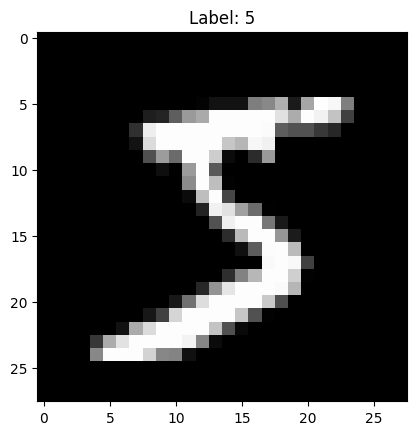

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the data into training and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0-1 for better performance in training
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visualize the first image in the dataset
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [3]:
# Build a simple neural network for digit recognition
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the image to a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer: 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8631 - loss: 0.4699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9569 - loss: 0.1477
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9670 - loss: 0.1077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9743 - loss: 0.0830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0756


In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.0934
Test accuracy: 0.9758


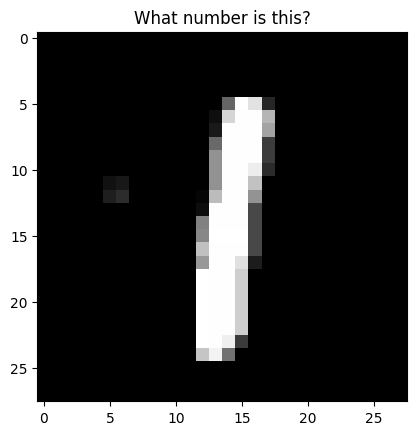

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Please enter the number you see (0-9): 1
Great job! You got it right!


In [6]:
import random

# Define a function to create the interactive game
def interactive_counting_game():
    # Randomly pick an index from the test set
    index = random.randint(0, len(X_test) - 1)

    # Get the image and the true label
    image = X_test[index]
    true_label = y_test[index]

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title("What number is this?")
    plt.show()

    # Predict the number using the trained model
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Get the user's input
    user_input = input(f"Please enter the number you see (0-9): ")

    # Provide feedback based on the user's input
    if int(user_input) == true_label:
        print("Great job! You got it right!")
    else:
        print(f"Oops! The correct number was {true_label}. Try again!")

# Run the interactive game
interactive_counting_game()


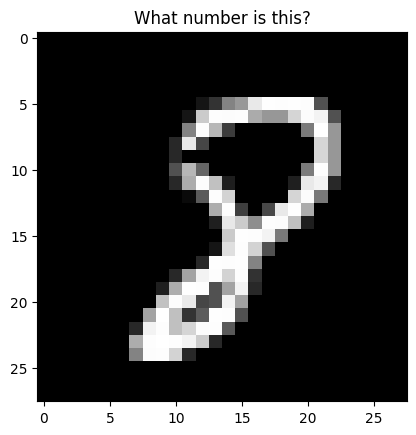

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model predicted: 8
Please enter the number you see (0-9): 8
Great job! You got it right!
Do you want to continue? (y/n): y


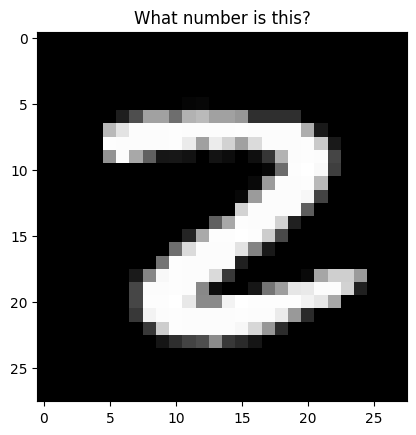

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model predicted: 2
Please enter the number you see (0-9): 2
Great job! You got it right!
Do you want to continue? (y/n): n
Game Over! Your final score is 2 points.


In [20]:

def interactive_counting_game():
    score = 0

    # Game loop: will keep presenting questions indefinitely
    while True:
        # Randomly pick an index from the test set
        index = random.randint(0, len(X_test) - 1)

        # Get the image and the true label
        image = X_test[index]
        true_label = y_test[index]

        # Display the image
        plt.imshow(image, cmap='gray')
        plt.title("What number is this?")
        plt.show()

        # Predict the number using the trained model
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction)

        # Provide feedback based on the user's input
        print(f"Model predicted: {predicted_label}")

        # Get the user's input (one chance to guess)
        user_input = input(f"Please enter the number you see (0-9): ")

        # Check if the user's input is correct
        if int(user_input) == true_label:
            print("Great job! You got it right!")
            score += 1  # Increase score for correct answer
        else:
            print(f"Oops! The correct number was {true_label}.")

        # Ask the user if they want to continue or stop
        continue_game = input("Do you want to continue? (y/n): ")
        if continue_game.lower() != 'y':
            break  # Exit the game if the user chooses not to continue

    # Final score
    print(f"Game Over! Your final score is {score} points.")

# Run the interactive game
interactive_counting_game()

Choose a game to play:
1. Shapes and Colors Game
2. Pattern Recognition Game
Enter the number of the game you want to play: 1
Welcome to the Shapes and Colors Adventure Game!
In this game, you'll learn about shapes, colors, and patterns!
Round 1:


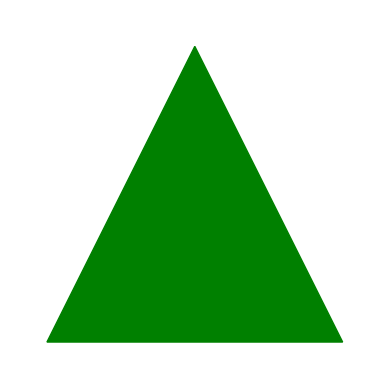

What shape is this (circle, square, triangle)? triangle
Correct! Well done.
What color is this (red, blue, green, yellow, orange)? green
Correct color! You're doing great.
Your current score is: 2

Round 2:


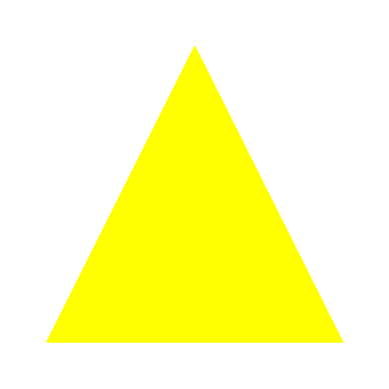

What shape is this (circle, square, triangle)? triangle
Correct! Well done.
What color is this (red, blue, green, yellow, orange)? yellow
Correct color! You're doing great.
Your current score is: 4

Round 3:


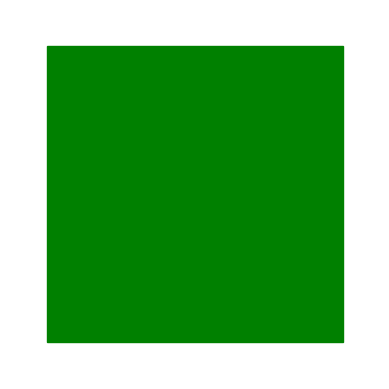

What shape is this (circle, square, triangle)? square
Correct! Well done.
What color is this (red, blue, green, yellow, orange)? red
Oops! The correct color is green. Keep going!
Your current score is: 5

Round 4:


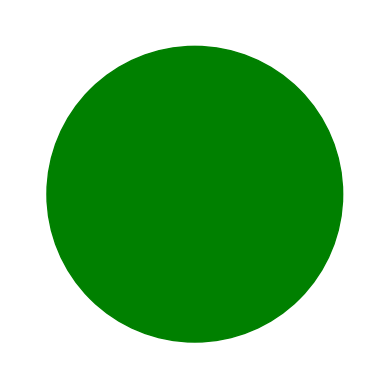

KeyboardInterrupt: Interrupted by user

In [21]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define some basic shapes and colors
shapes = ['circle', 'square', 'triangle']
colors = ['red', 'blue', 'green', 'yellow', 'orange']

# Function to draw the shape on the screen
def draw_shape(shape, color):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()

    if shape == 'circle':
        circle = plt.Circle((0.5, 0.5), 0.4, color=color)
        ax.add_artist(circle)
    elif shape == 'square':
        square = plt.Rectangle((0.1, 0.1), 0.8, 0.8, color=color)
        ax.add_artist(square)
    elif shape == 'triangle':
        triangle = plt.Polygon([(0.5, 0.9), (0.1, 0.1), (0.9, 0.1)], color=color)
        ax.add_artist(triangle)

    plt.show()

# Function to create the Shape and Color Learning Game
def shapes_and_colors_game():
    print("Welcome to the Shapes and Colors Adventure Game!")
    print("In this game, you'll learn about shapes, colors, and patterns!")

    score = 0
    rounds = 5  # Play 5 rounds

    # Game loop
    for round_number in range(rounds):
        # Randomly pick a shape and color
        shape = random.choice(shapes)
        color = random.choice(colors)

        # Show the shape and color to the player
        print(f"Round {round_number + 1}:")
        draw_shape(shape, color)

        # Ask the user to guess the shape or color
        user_guess = input(f"What shape is this (circle, square, triangle)? ")

        # Check if the guess is correct
        if user_guess.lower() == shape:
            print("Correct! Well done.")
            score += 1
        else:
            print(f"Oops! The correct shape is {shape}. Don't worry, let's keep learning!")

        # Ask the user to guess the color
        user_color_guess = input(f"What color is this (red, blue, green, yellow, orange)? ")

        # Check if the guess is correct
        if user_color_guess.lower() == color:
            print("Correct color! You're doing great.")
            score += 1
        else:
            print(f"Oops! The correct color is {color}. Keep going!")

        print(f"Your current score is: {score}\n")

    # End the game
    print(f"Game Over! Your final score is {score} out of {rounds * 2}.")
    if score == rounds * 2:
        print("Excellent! You know your shapes and colors very well!")
    elif score >= rounds:
        print("Great job! You did well, but keep practicing!")
    else:
        print("Good try! Keep playing and learning, you'll improve.")

# Function to create the Pattern Recognition Game
def pattern_recognition_game():
    print("Welcome to the Pattern Recognition Game!")
    print("In this game, you'll learn to recognize patterns!")

    patterns = [
        (['circle', 'square', 'circle'], 'square'),
        (['triangle', 'circle', 'triangle'], 'circle'),
        (['square', 'triangle', 'square'], 'triangle')
    ]

    # Choose a random pattern
    pattern, next_shape = random.choice(patterns)

    print(f"Here is the pattern: {', '.join(pattern)}")
    user_guess = input("What shape comes next? (circle, square, triangle): ")

    if user_guess.lower() == next_shape:
        print("Correct! You've recognized the pattern!")
    else:
        print(f"Oops! The correct answer is {next_shape}. Let's try again!")

    print("Good job! Keep practicing and you'll be a pattern master!")

# Run the Shapes and Colors Adventure Game
def play_game():
    print("Choose a game to play:")
    print("1. Shapes and Colors Game")
    print("2. Pattern Recognition Game")

    choice = input("Enter the number of the game you want to play: ")

    if choice == '1':
        shapes_and_colors_game()
    elif choice == '2':
        pattern_recognition_game()
    else:
        print("Invalid choice, please enter 1 or 2.")

# Start the game
play_game()


In [22]:
import random
import ipywidgets as widgets
from IPython.display import display

# Function to generate a random math question (addition or subtraction)
def generate_math_question(level):
    # Generate random numbers based on the difficulty level
    if level == 1:
        num1 = random.randint(1, 10)
        num2 = random.randint(1, 10)
    elif level == 2:
        num1 = random.randint(10, 20)
        num2 = random.randint(10, 20)
    elif level == 3:
        num1 = random.randint(20, 50)
        num2 = random.randint(20, 50)

    # Randomly choose between addition or subtraction
    operation = random.choice(['+', '-'])

    # Create the question based on the operation
    if operation == '+':
        question = f"{num1} + {num2}"
        correct_answer = num1 + num2
    else:
        question = f"{num1} - {num2}"
        correct_answer = num1 - num2

    return question, correct_answer

# Function to update the game state
class MathChallengeGame:
    def __init__(self):
        self.score = 0
        self.level = 1  # Start at level 1
        self.rounds = 0
        self.total_rounds = 10
        self.game_active = True

        # Create widgets
        self.question_text = widgets.Textarea(value="Welcome to the AI Math Challenge!\nLet's begin the game!",
                                               description="Question:", disabled=True, layout=widgets.Layout(width='auto'))
        self.answer_input = widgets.IntText(value=0, description="Your Answer:", disabled=False)
        self.submit_button = widgets.Button(description="Submit Answer")
        self.quit_button = widgets.Button(description="Quit Game")
        self.score_text = widgets.Label(value="Your current score: 0")

        # Set button actions
        self.submit_button.on_click(self.submit_answer)
        self.quit_button.on_click(self.quit_game)

        # Display widgets
        display(self.question_text, self.answer_input, self.submit_button, self.quit_button, self.score_text)

    def submit_answer(self, b):
        if not self.game_active:
            return

        # Get user answer
        user_answer = self.answer_input.value
        question, correct_answer = self.current_question

        # Check the answer
        if user_answer == correct_answer:
            self.score += 1
            if self.score % 3 == 0:  # Increase difficulty every 3 correct answers
                self.level += 1
                self.game_feedback(f"Correct! You're moving up a level! The problems will get harder now.")
            else:
                self.game_feedback(f"Correct! Great job.")
        else:
            self.game_feedback(f"Oops! The correct answer was {correct_answer}. Keep going!")

        # Increment round and update
        self.rounds += 1
        if self.rounds >= self.total_rounds:
            self.end_game()
        else:
            self.generate_new_question()

    def quit_game(self, b):
        self.game_active = False
        self.question_text.value = "You choose to quit the game. Thanks for playing!"
        self.submit_button.disabled = True
        self.quit_button.disabled = True

    def generate_new_question(self):
        # Generate a new math question
        question, correct_answer = generate_math_question(self.level)
        self.current_question = (question, correct_answer)
        self.update_game(self.rounds, question)

    def game_feedback(self, feedback):
        self.question_text.value = feedback
        self.score_text.value = f"Your current score: {self.score}"

    def update_game(self, round_number, question):
        self.question_text.value = f"Round {round_number + 1}: Solve the problem:\n{question}"
        self.score_text.value = f"Your current score: {self.score}"

    def end_game(self):
        self.game_active = False
        self.submit_button.disabled = True
        self.quit_button.disabled = True
        if self.score == self.total_rounds:
            self.question_text.value = f"Excellent! You completed all {self.total_rounds} rounds correctly!"
        else:
            self.question_text.value = f"Game Over! Your final score is {self.score} out of {self.total_rounds}."

# Start the game
game = MathChallengeGame()
game.generate_new_question()


Textarea(value="Welcome to the AI Math Challenge!\nLet's begin the game!", description='Question:', disabled=T…

IntText(value=0, description='Your Answer:')

Button(description='Submit Answer', style=ButtonStyle())

Button(description='Quit Game', style=ButtonStyle())

Label(value='Your current score: 0')